## Convolutional Neural Network Assignment

---

The case study is from a dataset from Kaggle. 

Link to the Kaggle project site:

https://www.kaggle.com/c/plant-seedlings-classification

 

The dataset has to be downloaded from the above Kaggle web site.

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

In [1]:
# importing necessary packages for this project
import pandas as pd
import numpy as np
import glob
import tensorflow
import os
import cv2

In [2]:
# In Windows env getting the current working directory
BASEDIR = os.getcwd()
print(BASEDIR)

E:\AIML-GL\Residency\chennai-batch-august-19-eronepius\Assignment\CNN


In [3]:
# full path of the images and appending to the basedir
path = BASEDIR + r'\plant-seedlings-classification\train\*\*.png' 
files = glob.glob(path)

In [4]:
# initianlization variables 

scale = 100
seed = 26

trainImg = []
trainLabel = []
j = 1
num = len(files)

In [5]:
for img in files:
    print(str("Image Processed : ") + str(j)+"/"+str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (scale, scale)))
    trainLabel.append(img.split('\\')[-2])
    j = j + 1

In [6]:
# converting the inputs images and labels to numpy array, hence it will be easy to parse them into the CNN
trainImg = np.asarray(trainImg)
trainLabel = np.asarray(trainLabel)

In [7]:
labels = list(np.unique(trainLabel))
labelCount = len(labels)

In [8]:
# convert the target labels to categorical values

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y = le.fit_transform(trainLabel)

In [9]:
trainImg.shape

(4750, 100, 100, 3)

In [10]:
len(Y)

4750

In [11]:
# normailizing pizels
trainImg = trainImg/255

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_Val, y_train, y_Val = train_test_split(trainImg, Y, test_size=0.20, random_state=42)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_Val = to_categorical(y_Val)

In [14]:
from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.backend import clear_session
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scale, scale, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(labelCount, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=35, 
                    validation_data=(X_Val, y_Val), batch_size=250)

Train on 3800 samples, validate on 950 samples
Epoch 1/35
3800/3800 [==============================] - 49s 13ms/sample - loss: 2.4387 - accuracy: 0.1355 - val_loss: 2.4106 - val_accuracy: 0.1474
Epoch 2/35
3800/3800 [==============================] - 49s 13ms/sample - loss: 2.4049 - accuracy: 0.1568 - val_loss: 2.2878 - val_accuracy: 0.2179
Epoch 3/35
3800/3800 [==============================] - 52s 14ms/sample - loss: 2.2096 - accuracy: 0.2387 - val_loss: 1.9455 - val_accuracy: 0.3189
Epoch 4/35
3800/3800 [==============================] - 46s 12ms/sample - loss: 1.9166 - accuracy: 0.3205 - val_loss: 1.7340 - val_accuracy: 0.3442
Epoch 5/35
3800/3800 [==============================] - 46s 12ms/sample - loss: 1.7146 - accuracy: 0.3861 - val_loss: 1.6185 - val_accuracy: 0.4126
Epoch 6/35
3800/3800 [==============================] - 46s 12ms/sample - loss: 1.6261 - accuracy: 0.4032 - val_loss: 1.5614 - val_accuracy: 0.4221
Epoch 7/35
3800/3800 [==============================] - 47s 12ms/

In [19]:
accuracy =  history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [20]:
import matplotlib
matplotlib.__version__

'3.0.0'

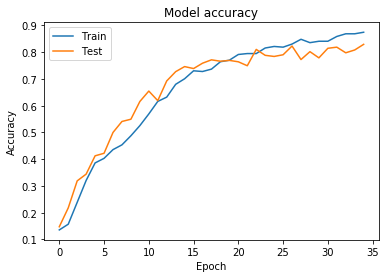

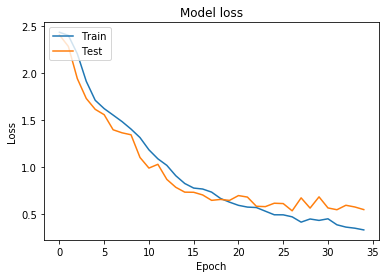

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# implementing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True,
        horizontal_flip=True)

In [23]:
datagen1.fit(X_train)

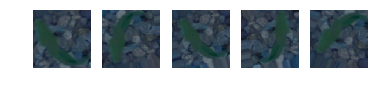

In [24]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train[10:11], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [25]:
history = model.fit_generator(datagen1.flow(X_train, y_train, batch_size = 75), epochs = 10, 
                              validation_data = (X_Val, y_Val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // 75)

Epoch 1/10
50/50 - 67s - loss: 1.0000 - accuracy: 0.6620 - val_loss: 0.6909 - val_accuracy: 0.7305
Epoch 2/10
50/50 - 67s - loss: 0.8729 - accuracy: 0.6969 - val_loss: 0.6140 - val_accuracy: 0.7726
Epoch 3/10
50/50 - 73s - loss: 0.8193 - accuracy: 0.7216 - val_loss: 0.6222 - val_accuracy: 0.7821
Epoch 4/10
50/50 - 67s - loss: 0.7587 - accuracy: 0.7423 - val_loss: 0.4938 - val_accuracy: 0.8095
Epoch 5/10
50/50 - 66s - loss: 0.7288 - accuracy: 0.7522 - val_loss: 0.4670 - val_accuracy: 0.8284
Epoch 6/10
50/50 - 67s - loss: 0.7006 - accuracy: 0.7530 - val_loss: 0.5450 - val_accuracy: 0.8105
Epoch 7/10
50/50 - 66s - loss: 0.6684 - accuracy: 0.7619 - val_loss: 0.5466 - val_accuracy: 0.8074
Epoch 8/10
50/50 - 67s - loss: 0.6578 - accuracy: 0.7742 - val_loss: 0.5003 - val_accuracy: 0.8105
Epoch 9/10
50/50 - 67s - loss: 0.5883 - accuracy: 0.7941 - val_loss: 0.5201 - val_accuracy: 0.8147
Epoch 10/10
50/50 - 66s - loss: 0.6300 - accuracy: 0.7842 - val_loss: 0.4780 - val_accuracy: 0.8379


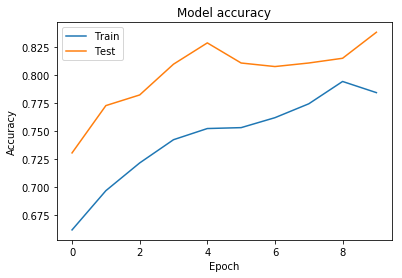

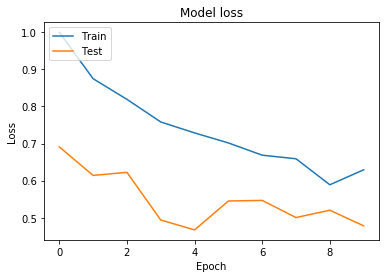

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
evals = model.evaluate(X_Val, y_Val)

950/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [65]:
acc = float(history.history['accuracy'][9])
acc = round(acc, 5)
valacc = float(evals[1])
valacc = round(valacc, 5)
print("Training Accuracy : {} %".format(acc*100))
print("Validation Accuracy : {} %".format(valacc*100))

Training Accuracy : 78.416 %
Validation Accuracy : 83.789 %
